In [57]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey.db')
df = pd.read_sql('SELECT * FROM survey_data', conn)

Text(0, 0.5, 'Average Job Satisfaction')

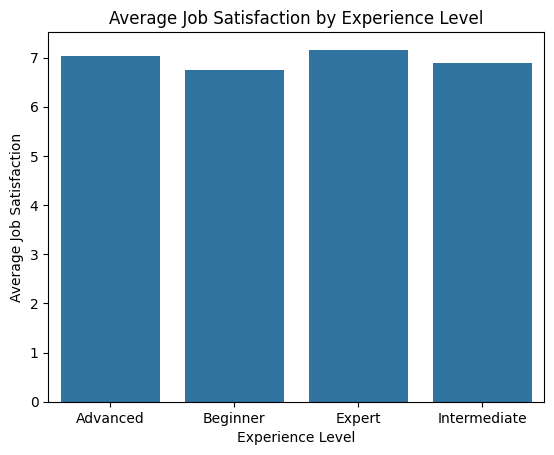

In [58]:
job_sat_median = df.groupby(df["ExperienceLevelCoding"])["JobSat"].mean().reset_index()

sns.barplot(x=job_sat_median["ExperienceLevelCoding"], y=job_sat_median["JobSat"])
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Job Satisfaction')

Text(0, 0.5, 'Job Satisfaction Level')

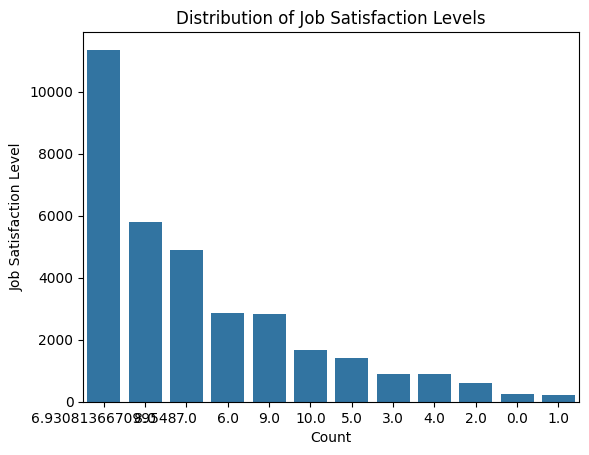

In [59]:
sns.countplot(x=df["JobSat"],order=df["JobSat"].value_counts().index)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Count')
plt.ylabel('Job Satisfaction Level')

In [69]:
df_copy = df.copy()

df_copy["Employment"] = df["Employment"].str.split(";")
df_copy = df_copy.explode("Employment")
df_copy["Employment"] = df_copy["Employment"].str.strip()
employment_remote_cross_table = pd.crosstab(df_copy['Employment'], df_copy['RemoteWork'])

Text(0, 0.5, 'Count')

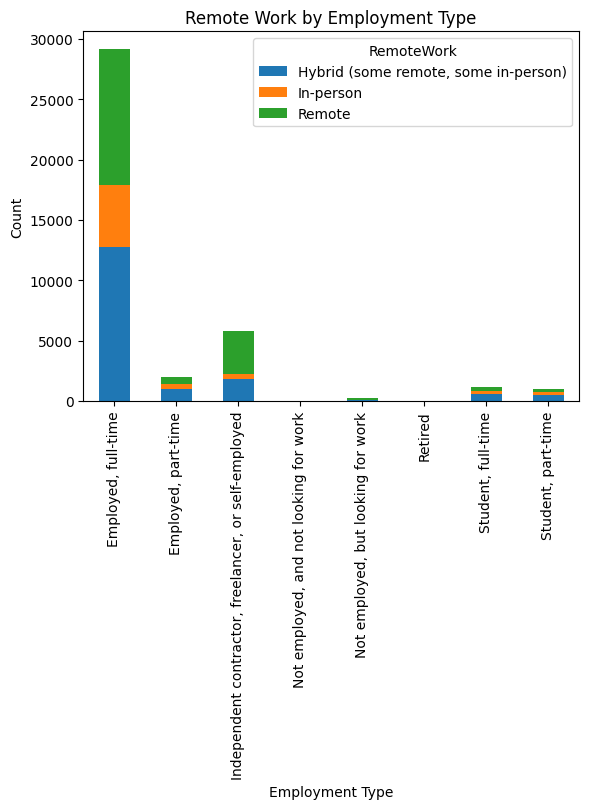

In [61]:
employment_remote_cross_table.plot(kind='bar', stacked=True,ax=plt.gca())
plt.title('Remote Work by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Ukraine'),
  Text(4, 0, 'India'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Netherlands')])

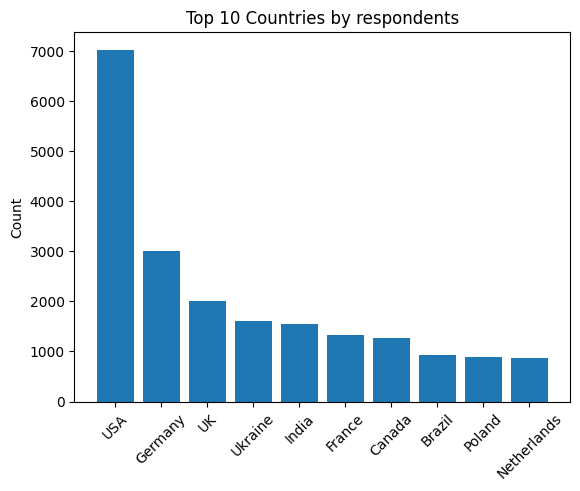

In [62]:
Language_Country_data = df.groupby("Country")["LanguageHaveWorkedWith"].count()
Language_Country_data = Language_Country_data.sort_values( ascending=False)
Language_Country_data = Language_Country_data.head(10)

plt.bar(x=Language_Country_data.index,height=Language_Country_data.values)
plt.title("Top 10 Countries by respondents")
plt.ylabel('Count')
plt.xticks(rotation=45)


Text(0, 0.5, 'Job Satisfaction Points')

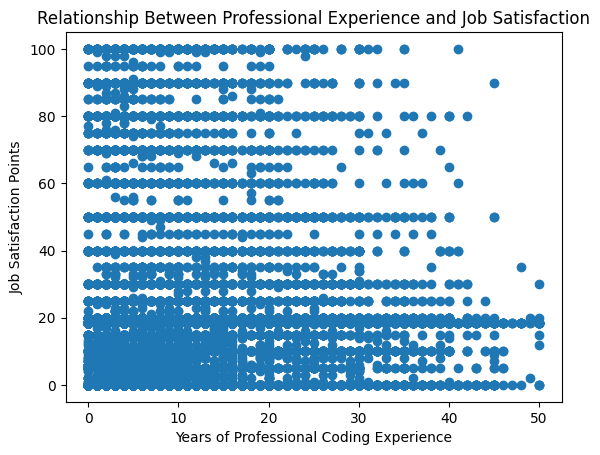

In [63]:
plt.scatter(x=df["YearsCodePro"],y=df["JobSatPoints_1"])
plt.title('Relationship Between Professional Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')

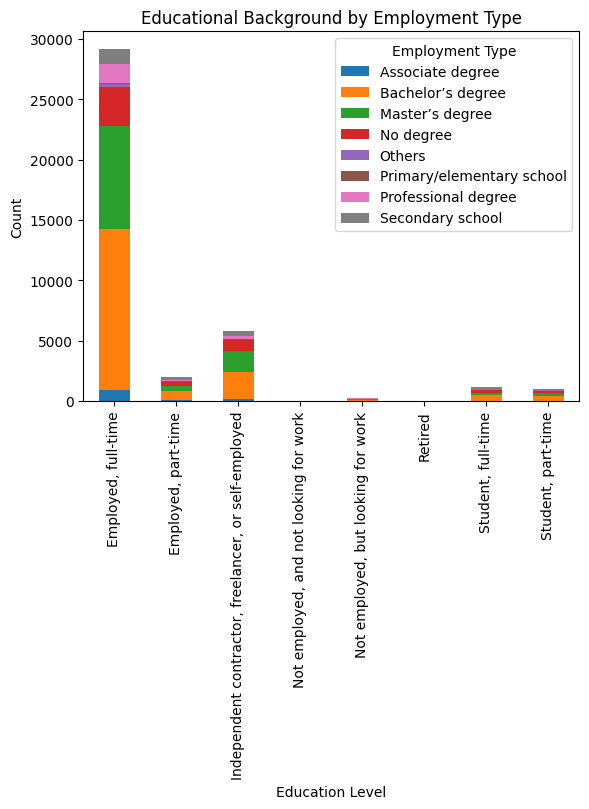

In [64]:
df_copy = df.copy()
df_copy["Employment"] = df_copy['Employment'].str.split(";")
df_copy = df_copy.explode("Employment")
df_copy["Employment"] = df_copy["Employment"].str.strip()

CrossTableEdlevelEmployment = pd.crosstab(df_copy["Employment"], df_copy["EdLevel"])
CrossTableEdlevelEmployment.plot(kind='bar', stacked=True,ax=plt.gca())
plt.title('Educational Background by Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.legend(title='Employment Type')

Text(0.5, 1.0, 'Job Satisfaction Distribution without null values')

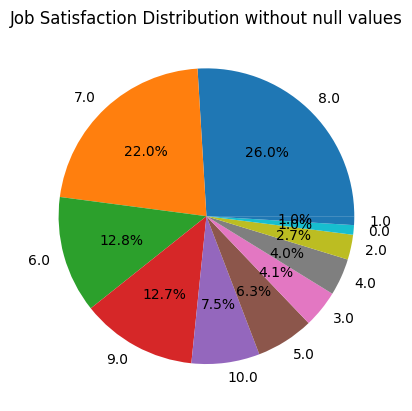

In [65]:
pie_data = df["JobSat"].replace(df["JobSat"].value_counts().idxmax(),np.nan).dropna()
pie_data = pie_data.value_counts()
plt.pie(pie_data.values,labels=pie_data.index, autopct='%1.1f%%')
plt.title('Job Satisfaction Distribution without null values')


Text(0, 0.5, 'Programming Language')

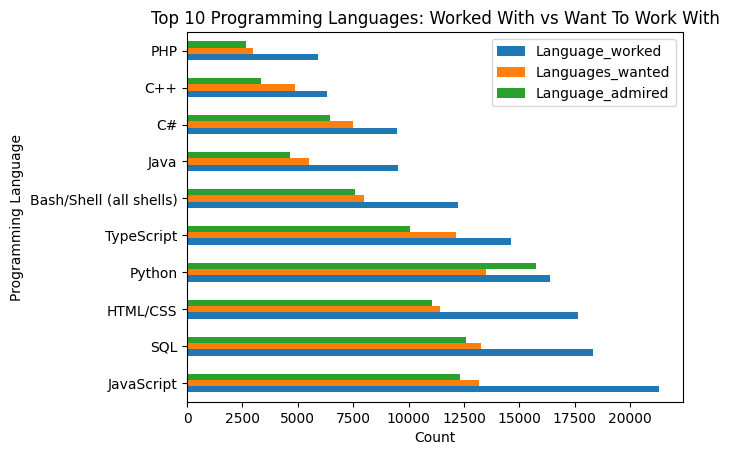

In [66]:
language_worked = df["LanguageHaveWorkedWith"].str.split(";").reset_index(drop=True)
language_worked = language_worked.explode()
language_worked = language_worked.groupby(language_worked).count()

language_want= df["LanguageWantToWorkWith"].str.split(";").reset_index(drop=True)
language_want = language_want.explode()
language_want = language_want.groupby(language_want).count()

language_admired= df["LanguageAdmired"].str.split(";").reset_index(drop=True)
language_admired = language_admired.explode()
language_admired = language_admired.groupby(language_admired).count()

language_df = pd.DataFrame({
    "Language_worked": language_worked,
    "Languages_wanted" : language_want,
    "Language_admired" : language_admired
})

language_df = language_df.sort_values('Language_worked', ascending=False).head(10)
language_df.plot(kind='barh')
plt.title('Top 10 Programming Languages: Worked With vs Want To Work With')
plt.xlabel('Count')
plt.ylabel('Programming Language')


Text(0.5, 23.52222222222222, 'Remote Work Type')

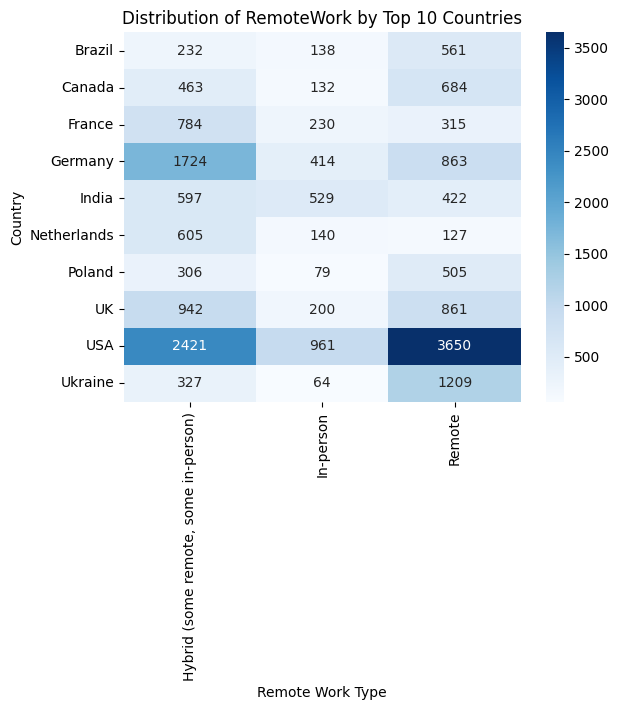

In [67]:
top_countries = df["Country"].value_counts().head(10)
df_top = df[df["Country"].isin(top_countries.index)]

pivot_table = df_top.pivot_table(
    index="Country",
    columns="RemoteWork",
    aggfunc='size'
)

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title("Distribution of RemoteWork by Top 10 Countries")
plt.ylabel("Country")
plt.xlabel("Remote Work Type")

Text(0, 0.5, 'Industry')

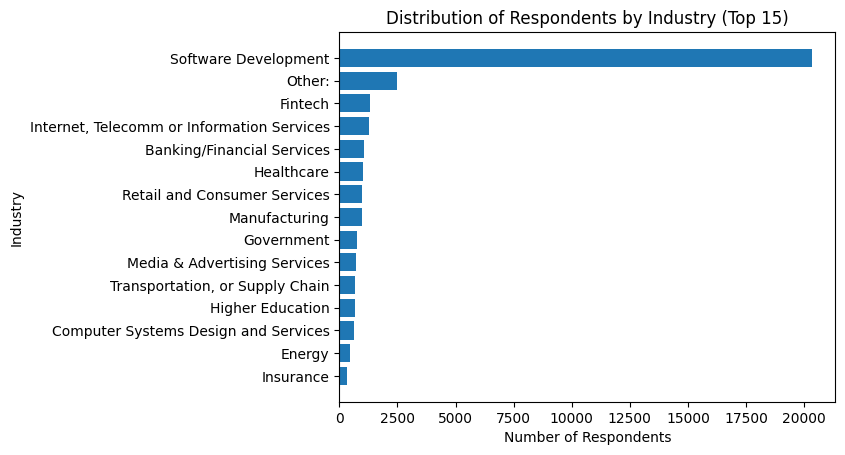

In [68]:
respondent_industries = df.groupby("Industry")["ResponseId"].count()
respondent_industries = respondent_industries.sort_values(ascending=True)

plt.barh(y=respondent_industries.index, width=respondent_industries.values)
plt.title('Distribution of Respondents by Industry (Top 15)')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')